<a href="https://colab.research.google.com/github/djdtimit/Deep-Learning/blob/master/Classifying_movie_reviews_(IMDB)_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying movie reviews (IMDB): binary classification

classify movie reviews as
positive or negative, based on the text content of the reviews

In [0]:
from keras.datasets import imdb

In [0]:
# keep only the 10000 most frequent occuring words
(train_data, train_labels) , (test_data, test_labels) = imdb.load_data(num_words=10000)

In [60]:
train_data.ndim

1

In [61]:
train_data.shape

(25000,)

In [62]:
# list of word indices
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [0]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [64]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [65]:
print(train_labels)

[1 0 0 ... 0 1 0]


In [66]:
test_data.shape

(25000,)

## balanced dataset

In [67]:
 len([label for label in train_labels if label == 1])

12500

In [68]:
 len([label for label in train_labels if label == 0])

12500

## Preparing the data

### one-hot encoding

In [0]:
import numpy as np

In [0]:
def vectorize_sequences(sequences, dimension=10000):
  one_hot_matrix = np.zeros((len(sequences), dimension))
  
  for i, sequence in enumerate(sequences):
    one_hot_matrix[i, sequence] = 1.0
    
  return one_hot_matrix

In [0]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [72]:
X_train.shape

(25000, 10000)

### vectorizing of labels

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [74]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

## Building the network

input data is vectors, and the labels are scalars (1s and 0s): simple stack of fully connected (Dense) layers with relu activations performs well on such a problem

sigmoid returns probability of label equal to 1

In [0]:
from keras import models
from keras import layers

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [77]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

W0903 18:58:55.106843 140265916606336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0903 18:58:55.131907 140265916606336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3657: The name tf.log is deprecated. Please use tf.math.log instead.

W0903 18:58:55.136613 140265916606336 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Configuring the optimizer

In [0]:
from keras import optimizers

In [0]:
model.compile(optimizer=optimizers.RMSprop(lr = 0.001), loss='binary_crossentropy', metrics=['accuracy'])

### using custom losses and metrics

In [0]:
from keras import losses, metrics

In [0]:
model.compile(optimizer=optimizers.RMSprop(lr = 0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

## Validation

In [0]:
X_val = X_train[:10000]
X_partial_train = X_train[10000:]
y_val = y_train[:10000]
y_partial_train = y_train[10000:]

In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [89]:
history = model.fit(X_partial_train, y_partial_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

W0903 19:20:48.290528 140265916606336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 7s 435us/step - loss: 0.5512 - acc: 0.7795 - val_loss: 0.4244 - val_acc: 0.8674
Epoch 2/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.3411 - acc: 0.8985 - val_loss: 0.3396 - val_acc: 0.8700
Epoch 3/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.2465 - acc: 0.9251 - val_loss: 0.2960 - val_acc: 0.8830
Epoch 4/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.1936 - acc: 0.9391 - val_loss: 0.3224 - val_acc: 0.8672
Epoch 5/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.1586 - acc: 0.9518 - val_loss: 0.2882 - val_acc: 0.8825
Epoch 6/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.1310 - acc: 0.9607 - val_loss: 0.2924 - val_acc: 0.8853
Epoch 7/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.1065 - acc: 0.9688 - val_loss: 0.3368 - 

## Plotting

In [0]:
history_dict = history.history

In [95]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [0]:
import matplotlib.pyplot as plt
% matplotlib inline

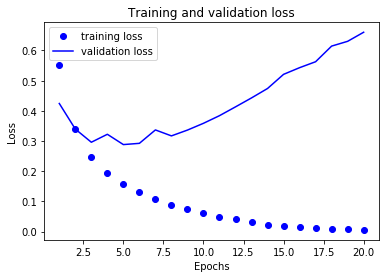

In [102]:
val_loss = history_dict['val_loss']
train_loss = history_dict['loss']

epochs = range(1, len(val_loss)+1)
plt.plot(epochs, train_loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

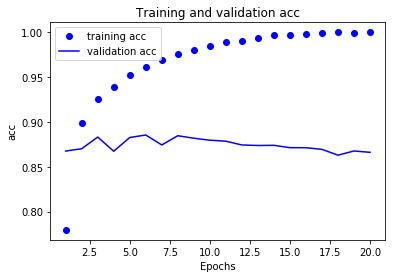

In [104]:
val_acc = history_dict['val_acc']
train_acc = history_dict['acc']

epochs = range(1, len(val_acc)+1)
plt.plot(epochs, train_acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [105]:
val_acc

[0.8673999992370606,
 0.8699999996185303,
 0.8830000002861023,
 0.8672,
 0.8824999997138977,
 0.8853000000953675,
 0.8741999998092651,
 0.8845000002861023,
 0.8817000000953674,
 0.8795000004768372,
 0.8784000001907348,
 0.8742,
 0.8735999998092652,
 0.8737999999046325,
 0.8711999997138977,
 0.8710999997138977,
 0.8693,
 0.8627999995231629,
 0.8674999997138977,
 0.8659999996185302]

In [106]:
val_loss

[0.4244114146232605,
 0.3396249638557434,
 0.2960110127925873,
 0.32235915155410766,
 0.28823593564033506,
 0.29236408076286313,
 0.33679107332229613,
 0.31704977712631227,
 0.33628498506546023,
 0.35873153076171876,
 0.3840444068431854,
 0.41318784132003783,
 0.4428722213745117,
 0.4740822287082672,
 0.5209254910469056,
 0.5430305050849915,
 0.5627270984172821,
 0.6145212679862976,
 0.6303640144348145,
 0.6604279664993287]